In [1]:
import pandas as pd
import numpy as np
import scanpy as sc #pip install scanpy
import anndata
import scipy

import sys,os
import scvi

Global seed set to 0


In [2]:
import matplotlib
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import rc_context
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.stats.multitest import multipletests

sc.logging.print_header()
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.9.6 anndata==0.9.2 umap==0.5.4 numpy==1.24.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.2 pynndescent==0.5.10


In [ ]:
adata = sc.read_h5ad('/home/jupyter/tmpmount/vasculature/cell/adata_all_cells_brain_log1p_scvi_240213.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 801715 × 30021
    obs: 'orig.ident', 'Sample', 'Winkler_annotation_ec', 'Winkler_annotation_mural', 'Winkler_annotation_mural_fine', 'donor', 'kit', 'study', 'organ_uni', 'Winkler_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Winkler_broad_annotation', 'id', 'organ', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_p

In [ ]:
adata.obs.kit

ctrl085_L_GGTGTCGTCAACTGAC                 10x3prime_v3
ctrl085_L_TCATTCAAGACGCTCC                 10x3prime_v3
ctrl085_L_GTGTCCTTCCAGCCTT                 10x3prime_v3
ctrl085_L_GTAGGTTTCAGACCGC                 10x3prime_v3
ctrl085_L_GTAGAAATCATTCGTT                 10x3prime_v3
                                               ...     
AGTGAGGAGGACAGAA_Human_colon_16S8002623       10x5prime
ACTGCTCTCCAGAAGG_Human_colon_16S8002623       10x5prime
CTCTAATGTCCCTACT_Human_colon_16S8002623       10x5prime
CATATTCGTACCGTAT_Human_colon_16S8002623       10x5prime
CACAGTAAGGGTCTCC_Human_colon_16S8002623       10x5prime
Name: kit, Length: 801715, dtype: category
Categories (7, object): ['10X', '10x3prime_v2', '10x3prime_v3', '10x5prime', '10x5prime_v1', '10x5prime_v2', '10x_3prime']

In [ ]:
#adata.obs_names_make_unique()

In [ ]:
adata.obs

orig.ident   Sample  \
ctrl085_L_GGTGTCGTCAACTGAC               ctrl085_L  CTRL085   
ctrl085_L_TCATTCAAGACGCTCC               ctrl085_L  CTRL085   
ctrl085_L_GTGTCCTTCCAGCCTT               ctrl085_L  CTRL085   
ctrl085_L_GTAGGTTTCAGACCGC               ctrl085_L  CTRL085   
ctrl085_L_GTAGAAATCATTCGTT               ctrl085_L  CTRL085   
...                                            ...      ...   
AGTGAGGAGGACAGAA_Human_colon_16S8002623        NaN      NaN   
ACTGCTCTCCAGAAGG_Human_colon_16S8002623        NaN      NaN   
CTCTAATGTCCCTACT_Human_colon_16S8002623        NaN      NaN   
CATATTCGTACCGTAT_Human_colon_16S8002623        NaN      NaN   
CACAGTAAGGGTCTCC_Human_colon_16S8002623        NaN      NaN   

                                        Winkler_annotation_ec  \
ctrl085_L_GGTGTCGTCAACTGAC                             Venous   
ctrl085_L_TCATTCAAGACGCTCC                               Art1   
ctrl085_L_GTGTCCTTCCAGCCTT                             Venous   
ctrl085_L_GTAGGTTTCAGACCGC                             Venous   
ctrl085_L_GTAGAAATCATTCGTT                             Venous   
...                                                       ...   
AGTGAGGAGGACAGAA_Human_colon_16S8002623                   NaN   
ACTGCTCTCCAGAAGG_Human_colon_16S8002623                   NaN   
CTCTAATGTCCCTACT_Human_colon_16S8002623                   NaN   
CATATTCGTACCGTAT_Human_colon_16S8002623                   NaN   
CACAGTAAGGGTCTCC_Human_colon_16S8002623                   NaN   

                                        Winkler_annotation_mural  \
ctrl085_L_GGTGTCGTCAACTGAC                                   NaN   
ctrl085_L_TCATTCAAGACGCTCC                                   NaN   
ctrl085_L_GTGTCCTTCCAGCCTT                                   NaN   
ctrl085_L_GTAGGTTTCAGACCGC                                   NaN   
ctrl085_L_GTAGAAATCATTCGTT                                   NaN   
...                                                          ...   
AGTGAGGAGGACAGAA_Human_colon_16S8002623                      NaN   
ACTGCTCTCCAGAAGG_Human_colon_16S8002623                      NaN   
CTCTAATGTCCCTACT_Human_colon_16S8002623                      NaN   
CATATTCGTACCGTAT_Human_colon_16S8002623                      NaN   
CACAGTAAGGGTCTCC_Human_colon_16S8002623                      NaN   

                                        Winkler_annotation_mural_fine  \
ctrl085_L_GGTGTCGTCAACTGAC                                        NaN   
ctrl085_L_TCATTCAAGACGCTCC                                        NaN   
ctrl085_L_GTGTCCTTCCAGCCTT                                        NaN   
ctrl085_L_GTAGGTTTCAGACCGC                                        NaN   
ctrl085_L_GTAGAAATCATTCGTT                                        NaN   
...                                                               ...   
AGTGAGGAGGACAGAA_Human_colon_16S8002623                           NaN   
ACTGCTCTCCAGAAGG_Human_colon_16S8002623                           NaN   
CTCTAATGTCCCTACT_Human_colon_16S8002623                           NaN   
CATATTCGTACCGTAT_Human_colon_16S8002623                           NaN   
CACAGTAAGGGTCTCC_Human_colon_16S8002623                           NaN   

                                           donor           kit  \
ctrl085_L_GGTGTCGTCAACTGAC               CTRL085  10x3prime_v3   
ctrl085_L_TCATTCAAGACGCTCC               CTRL085  10x3prime_v3   
ctrl085_L_GTGTCCTTCCAGCCTT               CTRL085  10x3prime_v3   
ctrl085_L_GTAGGTTTCAGACCGC               CTRL085  10x3prime_v3   
ctrl085_L_GTAGAAATCATTCGTT               CTRL085  10x3prime_v3   
...                                          ...           ...   
AGTGAGGAGGACAGAA_Human_colon_16S8002623      A38     10x5prime   
ACTGCTCTCCAGAAGG_Human_colon_16S8002623      A38     10x5prime   
CTCTAATGTCCCTACT_Human_colon_16S8002623      A38     10x5prime   
CATATTCGTACCGTAT_Human_colon_16S8002623      A38     10x5prime   
CACAGTAAGGGTCTCC_Human_colon_16S8002623      A38     10x5prime   

               

In [ ]:
df = pd.read_csv('/home/jupyter/tmpmount/vasculature/cell/vas_annotations.csv', index_col= 'barcode')
df

ann_vas_mid   ann_merged_final
barcode                                                          
CGTCAGGCATATGGTC_5386STDY7600838  Capillary.EC  myometrium_cap_ec
CTTAACTAGAATTCCC_5386STDY7600838     Venous.EC           ven_ec_2
TTTGGTTAGCTCCTCT_5386STDY7600838     Venous.EC           ven_ec_2
GATCTAGAGGGCTTCC_5386STDY7600838   Arterial.EC           art_ec_2
CTCGAGGGTCCGACGT_5386STDY7600838  Capillary.EC  myometrium_cap_ec
...                                        ...                ...
81_CZIKidney7587406                       vSMC            art_smc
82_CZIKidney7587406                  Pericytes             cap_pc
83_CZIKidney7587424                       vSMC            art_smc
84_CZIKidney7587406                       vSMC         ven_smc_pc
85_4602STDY6930852                        vSMC            ven_smc

[74555 rows x 2 columns]

In [ ]:
# Check for duplicated values under the index
duplicated_values = df.index[df.index.duplicated()]
len(duplicated_values)

20

In [ ]:
duplicated_values

Index([                               nan,                                nan,
                                      nan, 'TTACCGCCAAGCTACT_HCAHeart8102866',
       'AAGCGTTCAAGTTCGT_HCAHeart8102867', 'GACTTCCCATCTAACG_HCAHeart8102868',
                                      nan,                '0_4602STDY6930853',
                      '2_4602STDY6930852',                '8_4602STDY6930852',
                     '13_4602STDY6930853',               '16_4602STDY6930852',
                     '26_4602STDY6930852',               '27_4602STDY6930853',
                     '32_4602STDY6930853',               '44_4602STDY6930853',
                     '68_4602STDY6930852',               '69_4602STDY6930852',
                     '71_4602STDY6930852',               '72_4602STDY6930853'],
      dtype='object', name='barcode')

In [ ]:
# Remove rows with duplicated values in the index
df = df[~df.index.duplicated(keep='first')]

In [ ]:
# Check for duplicated values under the index
duplicated_values = df.index[df.index.duplicated()]
len(duplicated_values)

0

In [ ]:
# Ensure index alignment
common_index = df.index.intersection(adata.obs_names)

In [ ]:
df_subset = df.loc[common_index]
df_subset

ann_vas_mid   ann_merged_final
CGTCAGGCATATGGTC_5386STDY7600838  Capillary.EC  myometrium_cap_ec
CTTAACTAGAATTCCC_5386STDY7600838     Venous.EC           ven_ec_2
TTTGGTTAGCTCCTCT_5386STDY7600838     Venous.EC           ven_ec_2
GATCTAGAGGGCTTCC_5386STDY7600838   Arterial.EC           art_ec_2
CTCGAGGGTCCGACGT_5386STDY7600838  Capillary.EC  myometrium_cap_ec
...                                        ...                ...
TTCTACAGTCCGAACC_WSSS8123931         Pericytes             cap_pc
CAGCTAAAGTACACCT_WSSS8123931              vSMC            pul_smc
CGAGCACCAGGATTGG_WSSS8123931              vSMC            pul_smc
GGGATGAGTTCCACGG_WSSS8123931              vSMC            pul_smc
GCGCGATAGGAGTCTG_WSSS8123931              vSMC            pul_smc

[61961 rows x 2 columns]

In [ ]:
print("Length of common index:", len(common_index))
print("Length of adata.obs:", len(adata.obs))

Length of common index: 61961
Length of adata.obs: 801715


In [ ]:
# Merge the DataFrame with adata.obs based on common indices
adata.obs = pd.merge(adata.obs, df_subset, left_index=True, right_index=True, how='left')

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     '0': 'Lymphoid cells',
     '1': 'Endothelial cells',
     '2': 'Epithelial cells',
     '3': 'Fibroblasts',
     '4': 'B cells',
     '5': 'Fibroblasts',
     '6': 'Myeloid cells',
     '7': 'Mural cells',
     '8': 'Mural cells',
     '9': 'Myeloid cells',
    '10': 'Epithelial cells',
    '11': 'Epithelial cells',
    '12': 'Lymphoid cells',
    '13': 'B cells',
    '14': 'Myeloid cells',
    '15': 'Lymphoid cells',
    '16': 'Myeloid cells',
    '17': 'Satellite cells',
    '18': 'Epithelial cells',
    '19': 'Fibroblasts',
    '20': 'Endothelial cells',
    '21': 'Endothelial cells',
    '22': 'Epithelial cells',
    '23': 'B cells',
    '24': 'Myeloid cells',
    '25': 'Epithelial cells',
    '26': 'Lymphoid cells',
    '27': 'Epithelial cells',
    '28': 'Fibroblasts',
    '29': 'Myeloid cells',
    '30': 'Fibroblasts',
    '31': 'Mural cells',
    '32': 'Myeloid cells',
    '33': 'Endothelial cells',
    '34': 'Epithelial cells',
    '35': 'Epithelial cells',
    '36': 'Fibroblasts',
    '37': 'B cells',
    '38': 'Endothelial cells',
    '39': 'Myeloid cells',
    '40': 'Lymphoid cells',
    '41': 'Lymphoid cells',
    '42': 'Lymphoid cells',
    '43': 'Epithelial cells',

}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['leiden_anno'] = adata.obs['leiden_res_0.5'].map(cluster2annotation).astype('category')

In [ ]:
adata

AnnData object with n_obs × n_vars = 801715 × 30021
    obs: 'orig.ident', 'Sample', 'Winkler_annotation_ec', 'Winkler_annotation_mural', 'Winkler_annotation_mural_fine', 'donor', 'kit', 'study', 'organ_uni', 'Winkler_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Winkler_broad_annotation', 'id', 'organ', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_p

In [ ]:
adata.obs['donor_organ'] = adata.obs['donor'].astype(str) + '_' + adata.obs['organ_uni'].astype(str)

adata = adata[adata.obs["leiden_anno"].isin(["Endothelial cells", "Mural cells"])]

A13_uterus = adata[adata.obs['donor_organ'].isin(['A13_uterus'])]
sc.pp.subsample(A13_uterus, n_obs=1500)
A30_uterus = adata[adata.obs['donor_organ'].isin(['A30_uterus'])]
sc.pp.subsample(A30_uterus, n_obs=1500)
A25_muscle = adata[adata.obs['donor_organ'].isin(['A25_muscle'])]
sc.pp.subsample(A25_muscle, n_obs=1500)
A32_muscle = adata[adata.obs['donor_organ'].isin(['A32_muscle'])]
sc.pp.subsample(A32_muscle, n_obs=1500)
A33_muscle = adata[adata.obs['donor_organ'].isin(['A33_muscle'])]
sc.pp.subsample(A33_muscle, n_obs=1500)
A45_muscle = adata[adata.obs['donor_organ'].isin(['A45_muscle'])]
sc.pp.subsample(A45_muscle, n_obs=1500)
TSP2_muscle = adata[adata.obs['donor_organ'].isin(['TSP2_muscle'])]
sc.pp.subsample(TSP2_muscle, n_obs=1500)
A34_heart = adata[adata.obs['donor_organ'].isin(['A34_heart'])]
sc.pp.subsample(A34_heart, n_obs=1500)
A35_heart = adata[adata.obs['donor_organ'].isin(['A35_heart'])]
sc.pp.subsample(A35_heart, n_obs=1500)
A46_heart = adata[adata.obs['donor_organ'].isin(['A46_heart'])]
sc.pp.subsample(A46_heart, n_obs=1500)
A24_heart = adata[adata.obs['donor_organ'].isin(['A24_heart'])]
sc.pp.subsample(A24_heart, n_obs=1500)
TSP12_heart = adata[adata.obs['donor_organ'].isin(['TSP12_heart'])]
sc.pp.subsample(TSP12_heart, n_obs=1500)
A26_lung = adata[adata.obs['donor_organ'].isin(['A26_lung'])]
sc.pp.subsample(A26_lung, n_obs=1500)
A43_lung = adata[adata.obs['donor_organ'].isin(['A43_lung'])]
sc.pp.subsample(A43_lung, n_obs=1500)
A44_lung = adata[adata.obs['donor_organ'].isin(['A44_lung'])]
sc.pp.subsample(A44_lung, n_obs=1500)
TSP2_lung = adata[adata.obs['donor_organ'].isin(['TSP2_lung'])]
sc.pp.subsample(TSP2_lung, n_obs=1500)
A43_trachea = adata[adata.obs['donor_organ'].isin(['A43_trachea'])]
sc.pp.subsample(A43_trachea, n_obs=1500)
A56_spleen = adata[adata.obs['donor_organ'].isin(['A56_spleen'])]
sc.pp.subsample(A56_spleen, n_obs=1500)
A59_spleen = adata[adata.obs['donor_organ'].isin(['A59_spleen'])]
sc.pp.subsample(A59_spleen, n_obs=1500)
A60_spleen = adata[adata.obs['donor_organ'].isin(['A60_spleen'])]
sc.pp.subsample(A60_spleen, n_obs=1500)
A59_lymph_node = adata[adata.obs['donor_organ'].isin(['A59_lymph_node'])]
sc.pp.subsample(A59_lymph_node, n_obs=1500)
A60_lymph_node = adata[adata.obs['donor_organ'].isin(['A60_lymph_node'])]
sc.pp.subsample(A60_lymph_node, n_obs=1500)
A61_lymph_node = adata[adata.obs['donor_organ'].isin(['A61_lymph_node'])]
sc.pp.subsample(A61_lymph_node, n_obs=1500)
CTRL085_brain=adata[adata.obs['donor_organ'].isin(['CTRL085_brain'])]
sc.pp.subsample(CTRL085_brain, n_obs=1500)
CTRL086_brain=adata[adata.obs['donor_organ'].isin(['CTRL086_brain'])]
sc.pp.subsample(CTRL086_brain, n_obs=1500)
CTRL099_21_brain=adata[adata.obs['donor_organ'].isin(['CTRL099_21_brain'])]
sc.pp.subsample(CTRL099_21_brain, n_obs=1500)
CTRL099_22_brain=adata[adata.obs['donor_organ'].isin(['CTRL099_22_brain'])]
sc.pp.subsample(CTRL099_22_brain, n_obs=1500)
TSP10_adipose_tissue=adata[adata.obs['donor_organ'].isin(['TSP10_adipose_tissue'])]
sc.pp.subsample(TSP10_adipose_tissue, n_obs=1500)
TSP14_adipose_tissue=adata[adata.obs['donor_organ'].isin(['TSP14_adipose_tissue'])]
sc.pp.subsample(TSP14_adipose_tissue, n_obs=1500)
TSP2_thymus=adata[adata.obs['donor_organ'].isin(['TSP2_thymus'])]
sc.pp.subsample(TSP2_thymus, n_obs=1500)
TSP14_thymus=adata[adata.obs['donor_organ'].isin(['TSP14_thymus'])]
sc.pp.subsample(TSP14_thymus, n_obs=1500)
TSP2_large_vessels=adata[adata.obs['donor_organ'].isin(['TSP2_large_vessels'])]
sc.pp.subsample(TSP2_large_vessels, n_obs=1500)
TSP14_large_vessels=adata[adata.obs['donor_organ'].isin(['TSP14_large_vessels'])]
sc.pp.subsample(TSP14_large_vessels, n_obs=1500)
TSP4_uterus=adata[adata.obs['donor_organ'].isin(['TSP4_uterus'])]
sc.pp.subsample(TSP4_uterus, n_obs=1500)
TSP9_pancreas=adata[adata.obs['donor_organ'].isin(['TSP9_pancreas'])]
sc.pp.subsample(TSP9_pancreas, n_obs=1500)

bdata = adata
bdata = bdata[bdata.obs["donor_organ"].isin(['A12_oesophagus', 'A15_oesophagus', 'A21_oesophagus', 'A23_muscle',
       'A23_oesophagus', 'A25_oesophagus', 'A26_heart', 'A29_heart',
       'A32_large_intestine', 'A32_small_intestine',
       'A34_large_intestine', 'A34_lymph_node', 'A34_small_intestine',
       'A37_lung', 'A38_large_intestine', 'A38_small_intestine',
       'A40_lung', 'A40_trachea', 'A44_trachea', 'A47_lung', 'A51_lung',
       'A51_spleen', 'A56_lymph_node', 'A61_spleen', 'A6_oesophagus',
       'CTRL12_brain', 'E1_uterus', 'E2_uterus', 'E3_uterus',
       'F19_decidua', 'F20_decidua', 'F25_decidua', 'F27_decidua',
       'F36_decidua', 'F40_decidua', 'HD1_liver', 'HD2_liver',
       'HD3_liver', 'RCC1_kidney', 'RCC2_kidney', 'RCC3_kidney',
       'TSP14_bladder', 'TSP14_large_intestine', 'TSP14_liver',
       'TSP14_lung', 'TSP14_lymph_node', 'TSP14_muscle',
       'TSP14_small_intestine', 'TSP14_spleen', 'TSP1_bladder',
       'TSP1_lung', 'TSP1_muscle', 'TSP1_pancreas', 'TSP2_bladder',
       'TSP2_kidney', 'TSP2_large_intestine', 'TSP2_lymph_node',
       'TSP2_small_intestine', 'TSP2_spleen', 'TSP2_trachea',
       'TSP6_liver', 'TSP6_trachea', 'TSP7_lymph_node', 'TSP7_spleen',
       'TxK1_kidney', 'TxK3_kidney', 'TxK4_kidney', 'VHL_RCC_kidney',
       'Wilms2_kidney'])]

bdata = bdata.concatenate(A13_uterus, A24_heart, A25_muscle, A26_lung, A30_uterus,
       A32_muscle, A33_muscle, A34_heart, A35_heart, A43_lung,
       A43_trachea, A44_lung, A45_muscle, A46_heart, A56_spleen,
       A59_lymph_node, A59_spleen, A60_lymph_node,A60_spleen,
       A61_lymph_node, CTRL085_brain, CTRL086_brain,
       CTRL099_21_brain, CTRL099_22_brain, TSP10_adipose_tissue,
       TSP12_heart, TSP14_adipose_tissue, TSP14_large_vessels,
       TSP14_thymus, TSP2_large_vessels, TSP2_lung, TSP2_muscle,
       TSP2_thymus, TSP4_uterus, TSP9_pancreas)

/opt/conda/envs/scvi/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


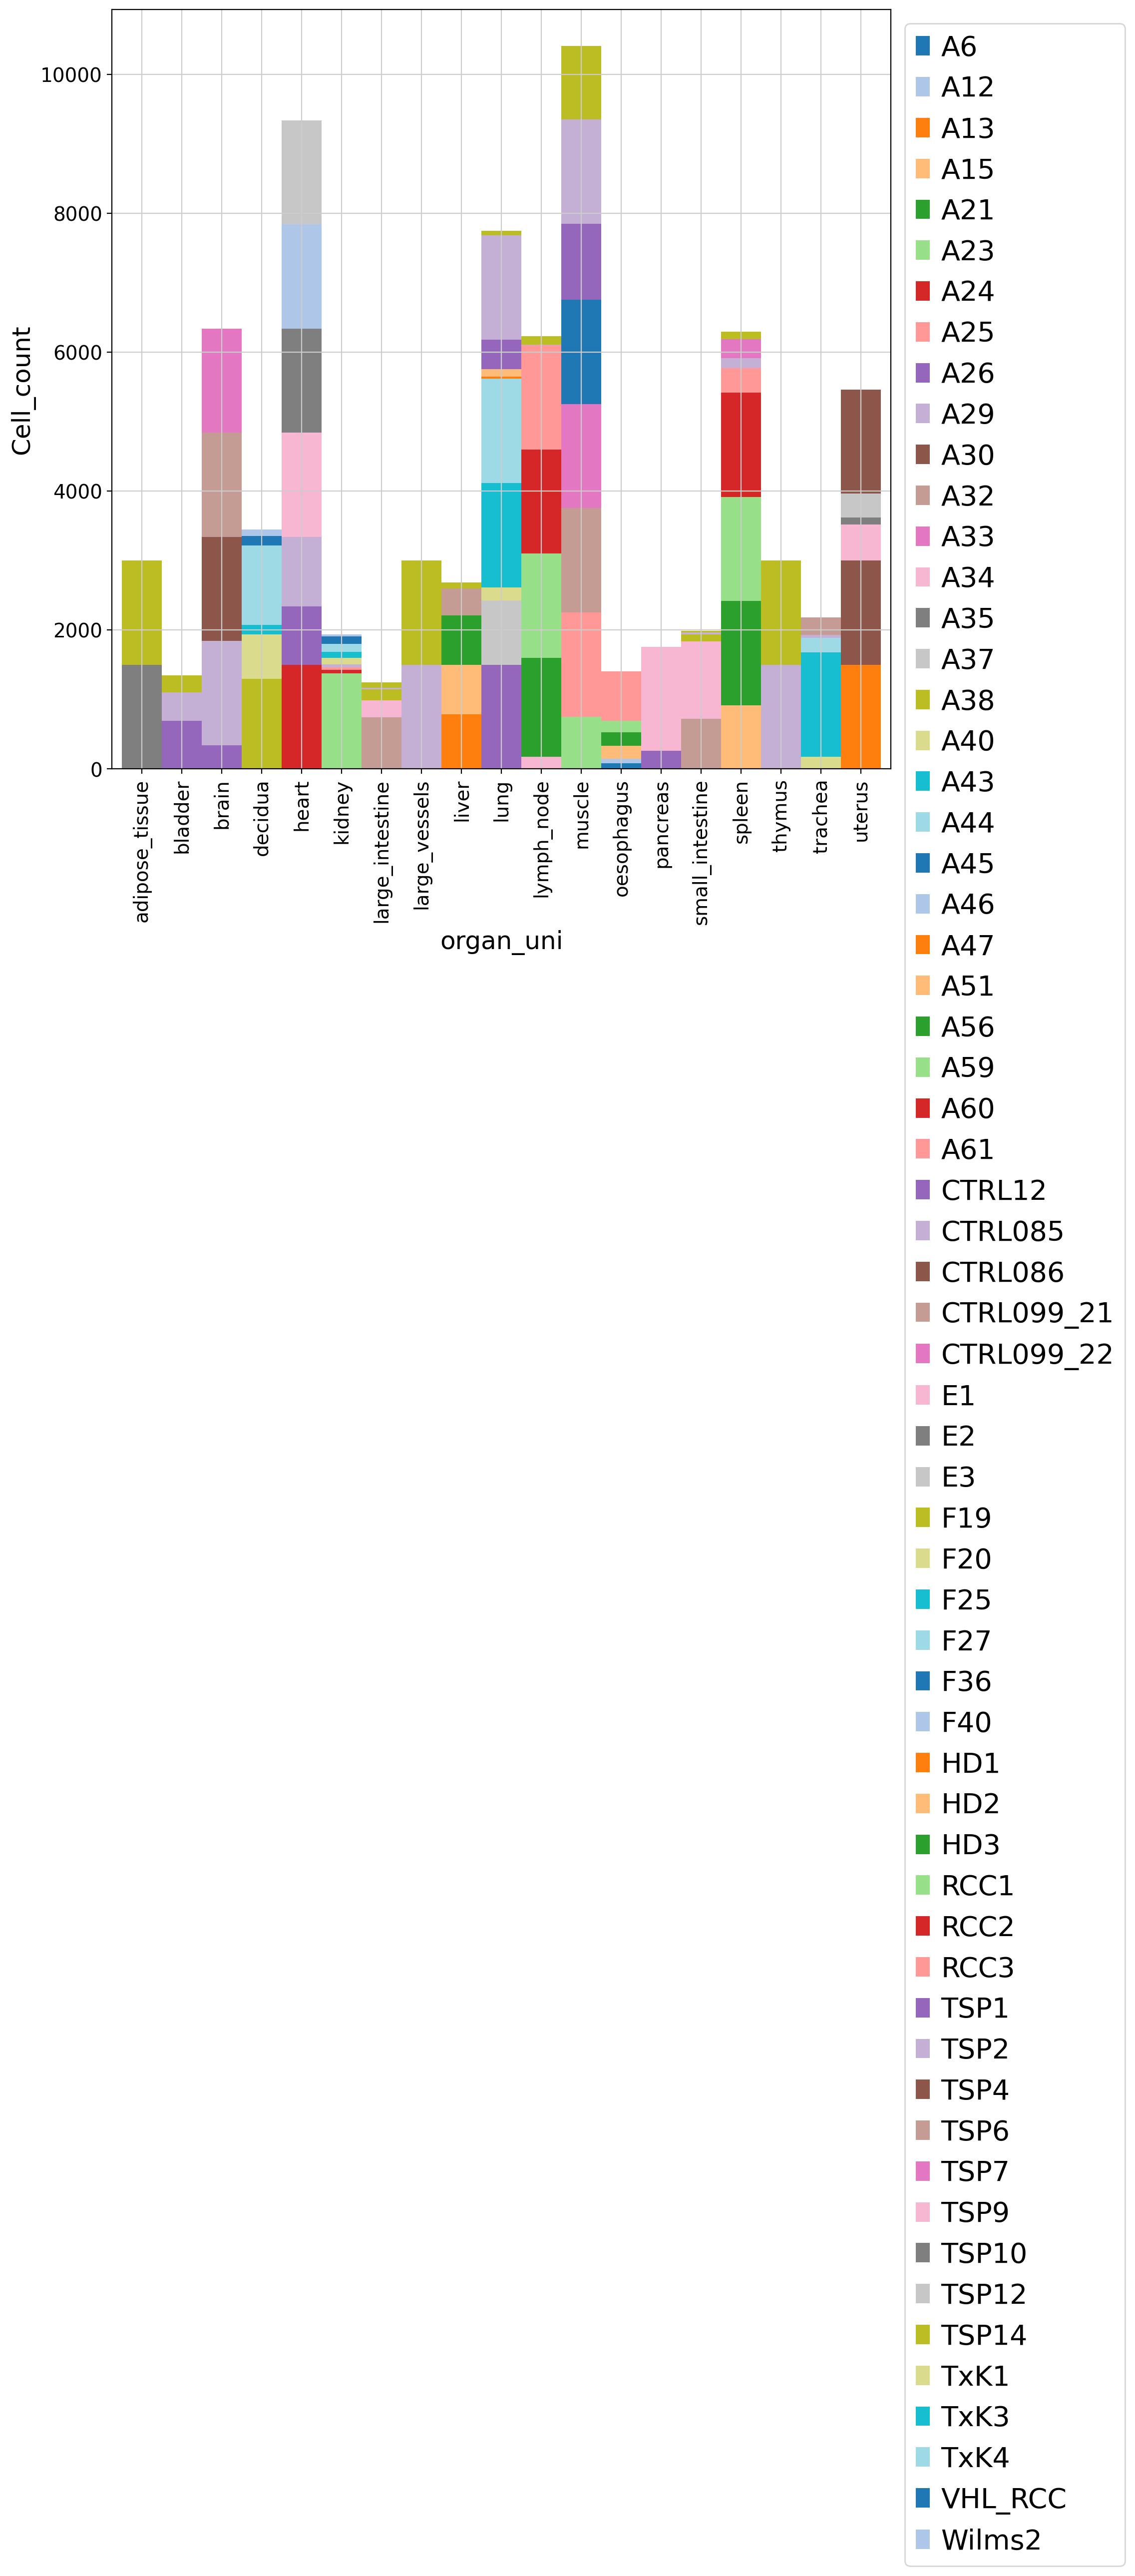

In [ ]:
df = pd.crosstab(bdata.obs["organ_uni"], bdata.obs["donor"])

import matplotlib.pyplot as plt

# Set the figure size before creating the plot
fig, ax = plt.subplots(figsize=(10, 10))  # Creating the figure and axis

# Assuming 'tmp' is your DataFrame containing the data for the bar plot
# Define a color palette with 22 colors
color_palette = plt.get_cmap('tab20').colors[:22]

# Plot the bar plot with stacked bars and custom colors
df.plot.bar(ax=ax, stacked=True, width=1, color=color_palette)

# Set tick label font size
ax.tick_params(axis='both', labelsize=14)

# Set x-axis label with larger font size
ax.set_xlabel('organ_uni', fontsize=18)

# Set y-axis label with larger font size
ax.set_ylabel('Cell_count', fontsize=18)

# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=20)

# Show the plot
plt.show()

In [ ]:
bdata

AnnData object with n_obs × n_vars = 78831 × 30021
    obs: 'orig.ident', 'Sample', 'Winkler_annotation_ec', 'Winkler_annotation_mural', 'Winkler_annotation_mural_fine', 'donor', 'kit', 'study', 'organ_uni', 'Winkler_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Winkler_broad_annotation', 'id', 'organ', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pv

In [ ]:
bdata.write('/home/jupyter/tmpmount/vasculature/cell/subsample_sam_ec_mural_240430.h5ad', compression='gzip')

In [ ]:
adata = bdata

In [ ]:
adata

AnnData object with n_obs × n_vars = 78831 × 30021
    obs: 'orig.ident', 'Sample', 'Winkler_annotation_ec', 'Winkler_annotation_mural', 'Winkler_annotation_mural_fine', 'donor', 'kit', 'study', 'organ_uni', 'Winkler_annotation', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Winkler_broad_annotation', 'id', 'organ', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pv

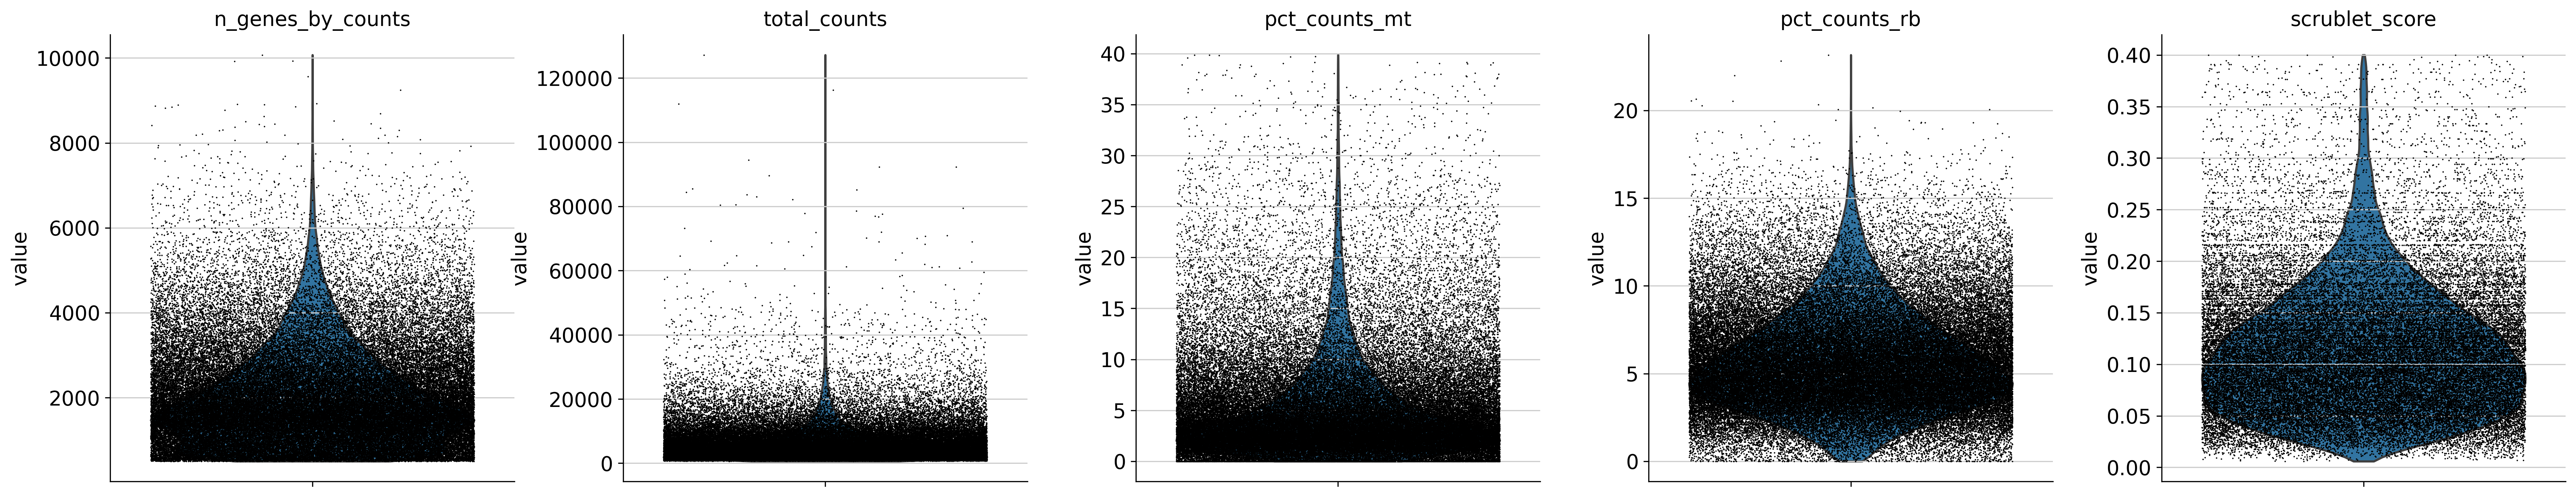

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_rb', 'scrublet_score'],
             jitter=0.4, multi_panel=True)

# n_latent = 30

In [3]:
adata = sc.read_h5ad('/home/jupyter/tmpmount/vasculature/cell/subsample_sam_ec_mural_240430.h5ad')

In [4]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=1500,
    layer="counts",
    subset = True, 
    batch_key="study")
scvi.model.SCVI.setup_anndata(
    adata, 
    layer="counts", 
    batch_key="donor", 
    categorical_covariate_keys=['study','kit'], 
    continuous_covariate_keys=['total_counts', 'n_genes_by_counts','pct_counts_mt', 'pct_counts_rb'] #,'score_stress_genes''score_stress_genes' 'pct_counts_mt', 'pct_counts_rb','score_stress_genes'
)
vae = scvi.model.SCVI(adata, n_layers=2, n_latent=30) #, n_latent=30
#scvi.data.view_anndata_setup(adata)
vae
vae.train()
adata.obsm["X_scVI"] = vae.get_latent_representation()
adata.X.shape
sc.pp.neighbors(adata, use_rep="X_scVI")

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/opt/conda/envs/scvi/lib/python3.8/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=101 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 101/101: 100%|██████████| 101/101 [11:14<00:00,  6.68s/it, loss=534, v_num=1]
computing neighbors


/opt/conda/envs/scvi/lib/python3.8/site-packages/pynndescent/pynndescent_.py:346: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "/opt/conda/envs/scvi/lib/python3.8/site-packages/numba/core/types/functions.py", line 486, in __getnewargs__
    raise ReferenceError("underlying object has vanished")

  init_rp_tree(data, dist, current_graph, leaf_array)
/opt/conda/envs/scvi/lib/python3.8/site-packages/pynndescent/pynndescent_.py:348: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#de

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:21)


In [5]:
#sc.tl.leiden(adata, resolution = 0.7, key_added = "leiden_scVI")
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:51)


/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


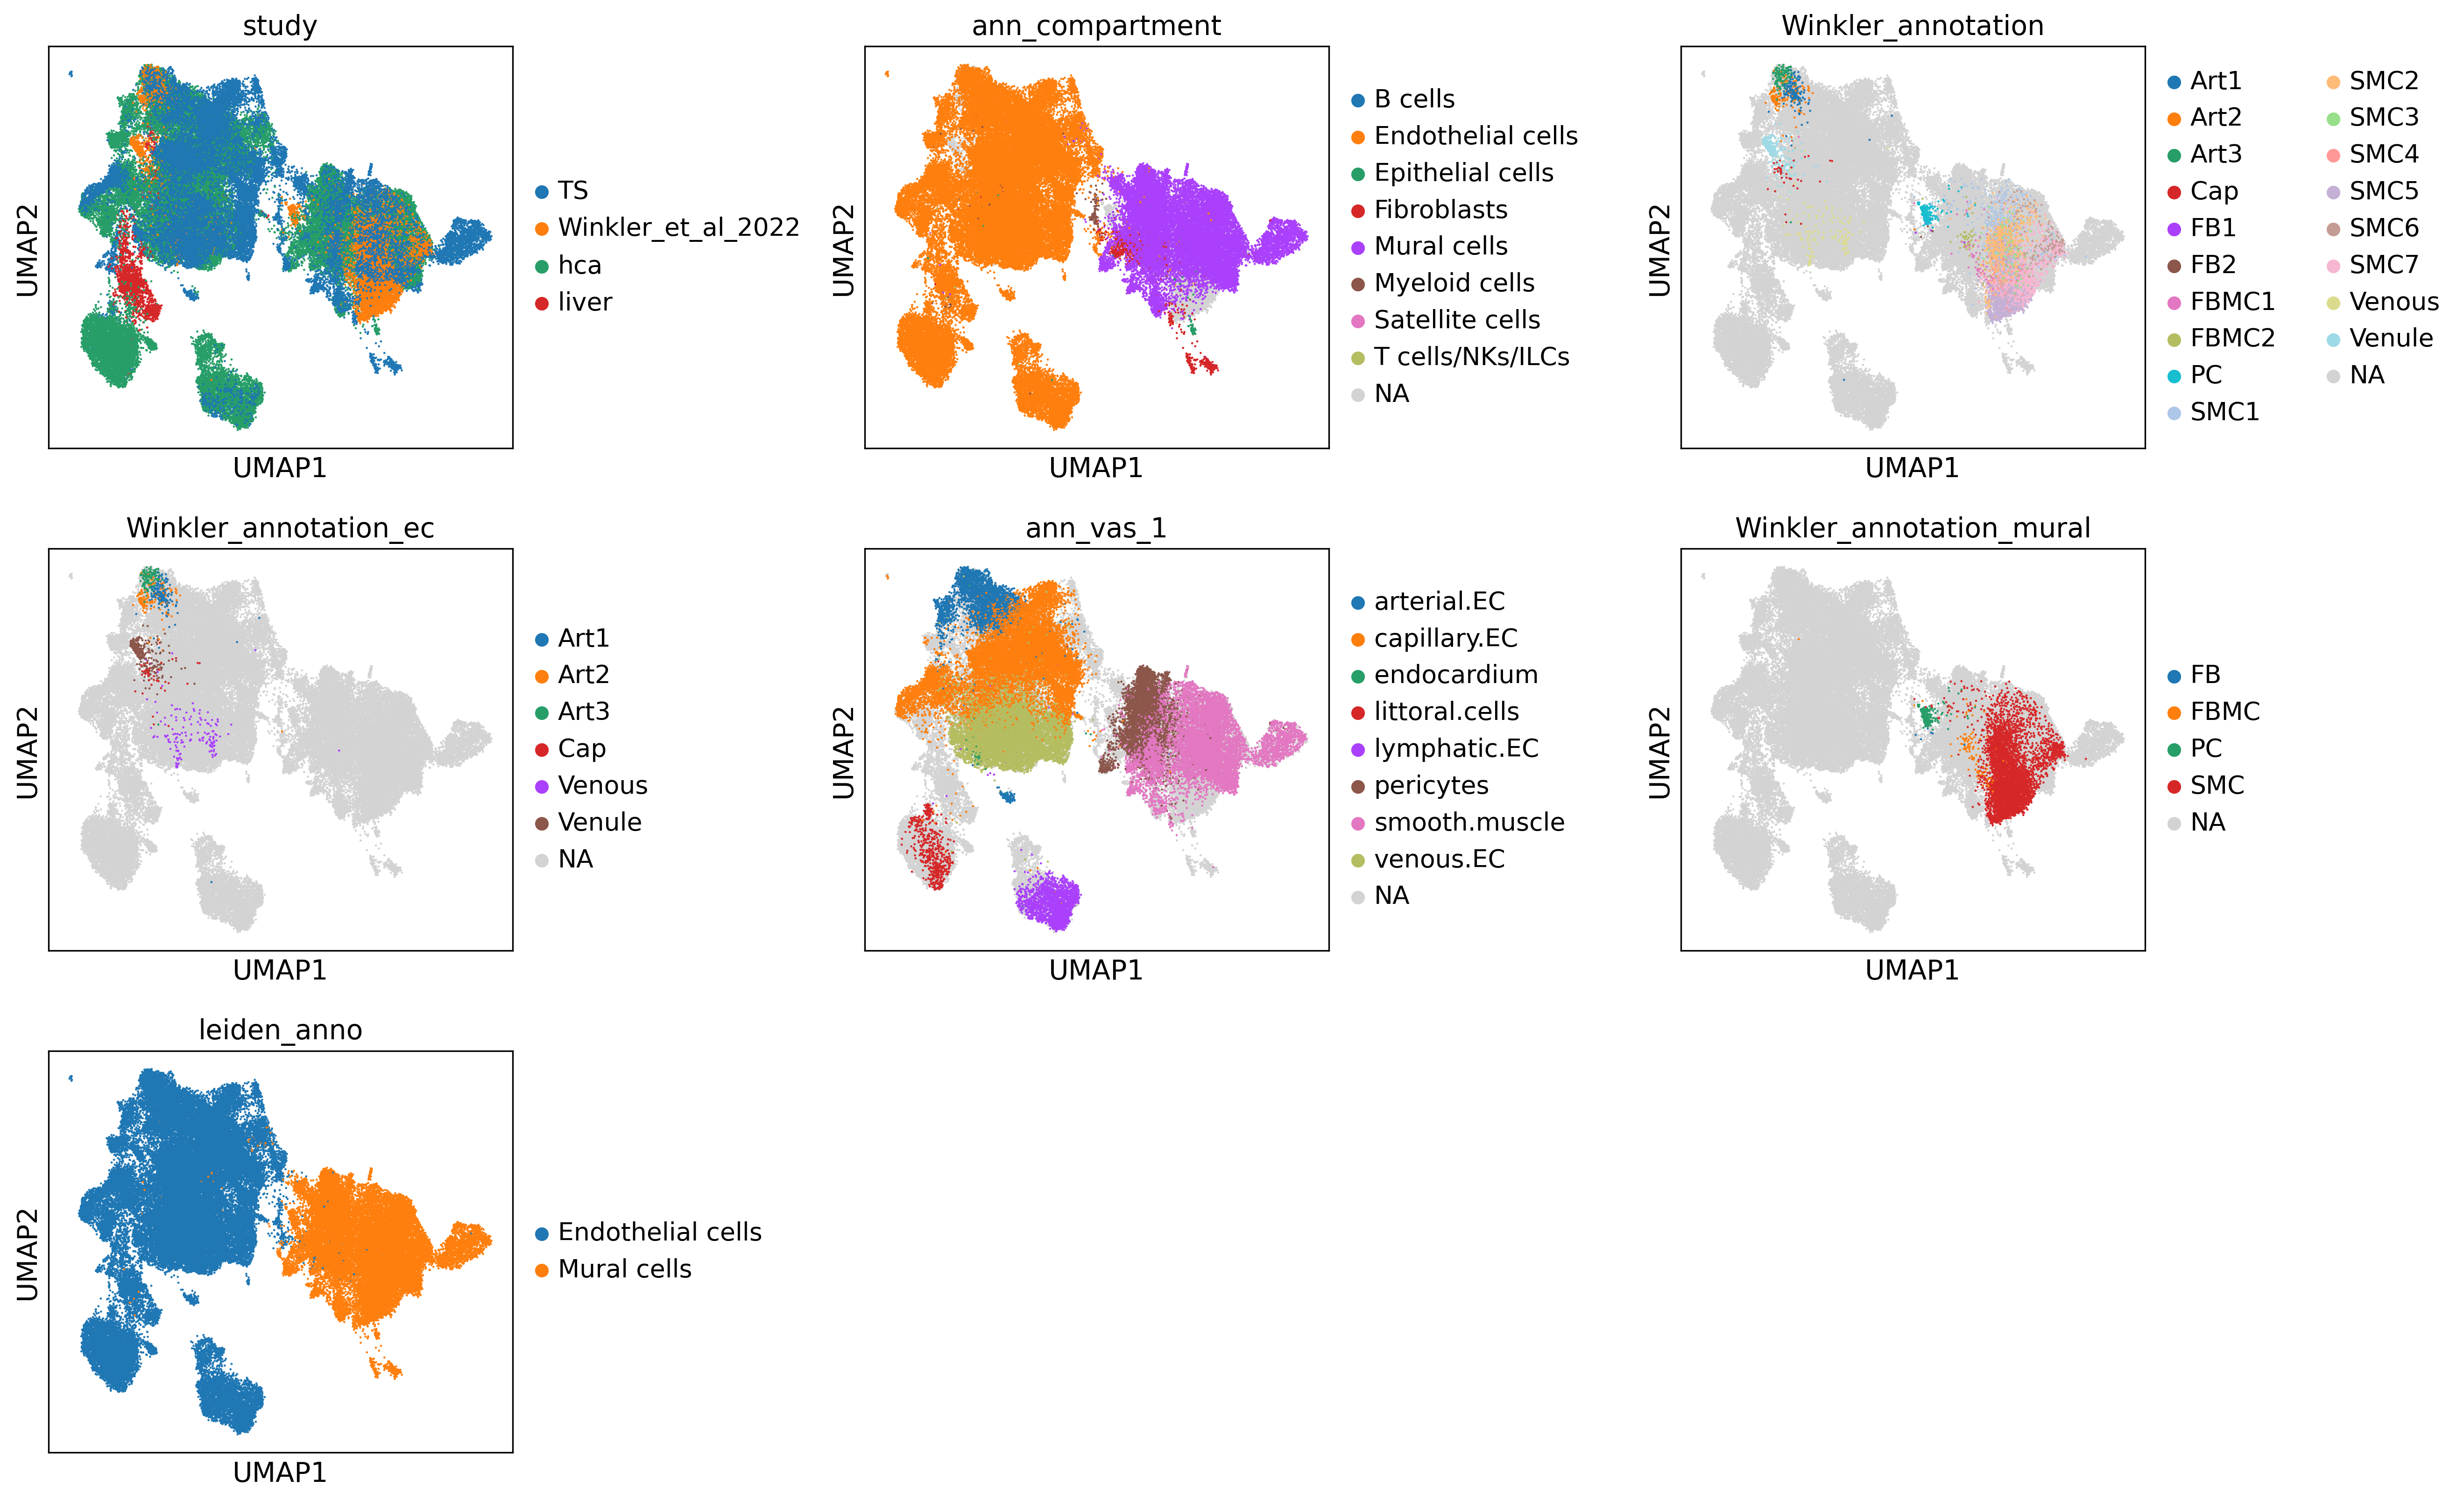

In [6]:
sc.settings.set_figure_params(dpi=150, facecolor='white')
sc.pl.umap(adata, color = ['study', 'ann_compartment', 'Winkler_annotation', 'Winkler_annotation_ec', 'ann_vas_1', 'Winkler_annotation_mural', 'leiden_anno'], 
           wspace = 0.6, ncols = 3, size = 5)

/opt/conda/envs/scvi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


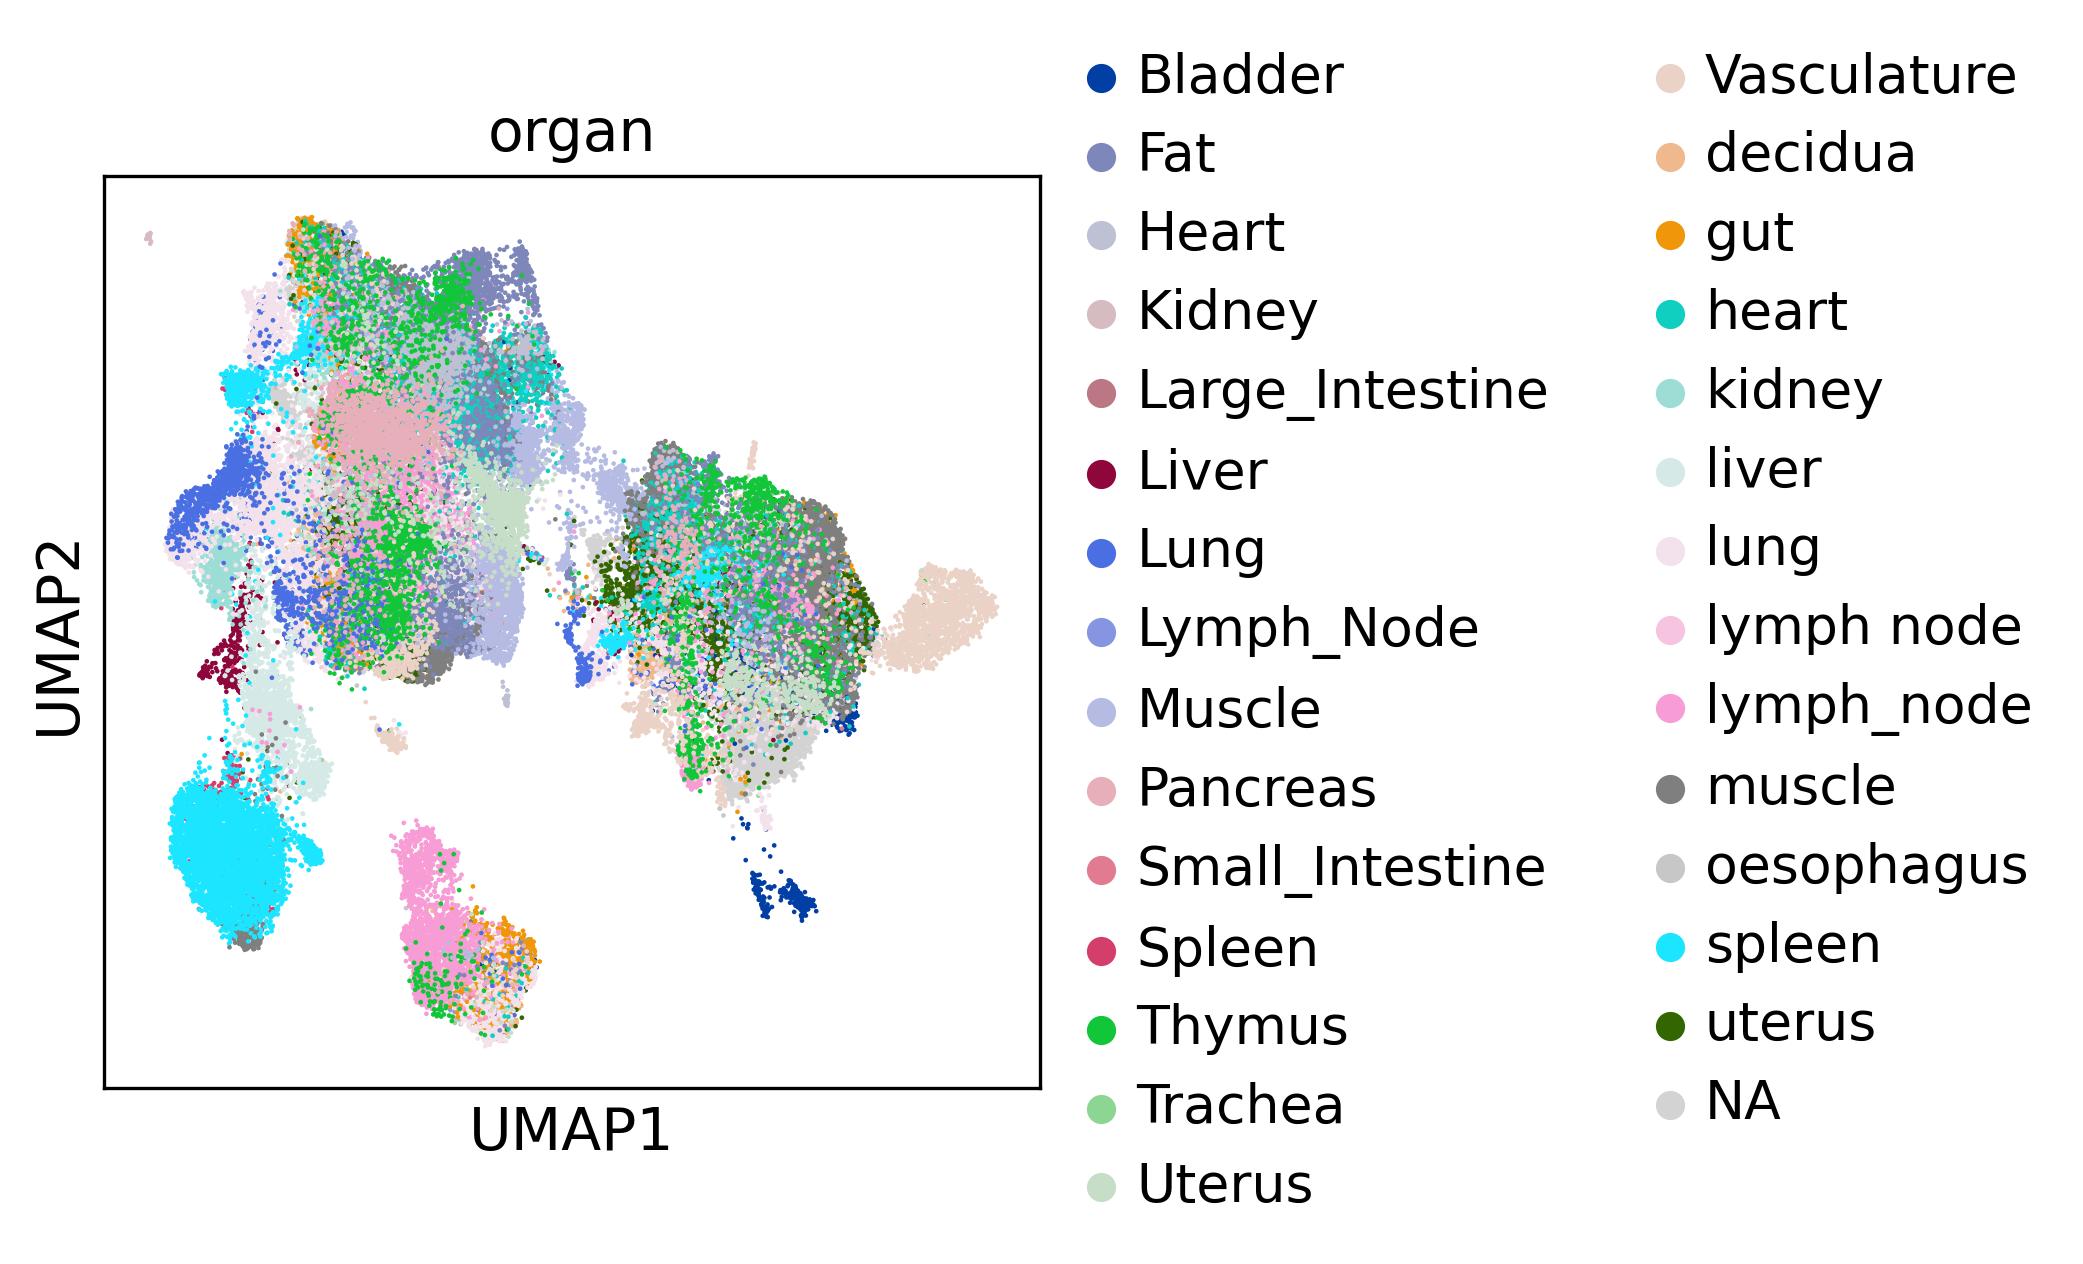

In [8]:
sc.settings.set_figure_params(dpi=150, facecolor='white')
sc.pl.umap(adata, color = ['organ'],
           wspace = 0.6, ncols = 3, size = 5)

In [10]:
sc.tl.leiden(adata, resolution = 0.1, key_added = 'leiden_0.1')

running Leiden clustering
    finished: found 9 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:12)


In [11]:
sc.tl.leiden(adata, resolution = 0.5, key_added = 'leiden_0.5')

running Leiden clustering
    finished: found 19 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:12)


In [44]:
bdata.obsm = adata.obsm
bdata.obsp = adata.obsp
bdata.obs = adata.obs
bdata.uns = adata.uns

In [47]:
bdata.write('/home/jupyter/tmpmount/vasculature/cell/vas_subsampled_240430.h5ad', compression = 'gzip')